## Import necessary packages

In [147]:
from __future__ import division,print_function

import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import clear_output

import seaborn

## Read data description

In [148]:
with open("data_description.txt","r") as fp:
    for line in fp:
        print(line)

--------------------Data Dictionary--------------------

Variable|	Definition|	Key|

-------------------------------------------------------

survival| 	Survival | 	0 = No, 1 = Yes |

pclass |	Ticket class |	1 = 1st, 2 = 2nd, 3 = 3rd|

name|  Name of the passenger |-

sex |	Sex |	

Age |	Age in years |	-

sibsp| 	# of siblings / spouses aboard the Titanic |-

parch |	# of parents / children aboard the Titanic 	|-

ticket| 	Ticket number |	-

fare |	Passenger fare 	| -

cabin |	Cabin number |	-

embarked |	Port of Embarkation |	C = Cherbourg, Q = Queenstown, S = Southampton|





-----------------Variable Notes-----------------------



pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower



age: Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5



sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

## Loading the training data using pandas

In [160]:
train = pd.read_csv("./data/train.csv")
print(train.shape) #891 data points for training

(891, 12)


## Exploratory data analysis of train data

In [150]:
train.groupby(["Survived"])["Survived"].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

**Remark:** Of 891 people 549(61.6%) perished and 342(38.4%) survived

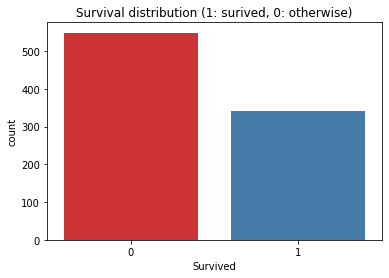

In [151]:
#Survival distribution

plt.title("Survival distribution (1: surived, 0: otherwise)")
seaborn.countplot("Survived",data=train,palette="Set1")
plt.savefig("./output/survival.png")
plt.show()

In [152]:
#missing values per every column
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Remark:** Age column, Cabin and Embarked contains missing values

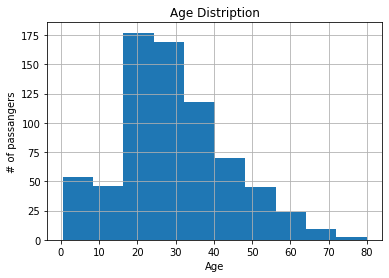

In [153]:
#Age distribution
plt.title("Age Distription")
plt.xlabel("Age")
plt.ylabel("# of passangers")
train.Age.hist(bins=10)
plt.savefig("./output/age.png")

**Remark:** Majority of the passengers falls in 18-40 age group as per the histogram above.

In [154]:
# Survival counts by gender
train.groupby(["Survived","Sex"])["Survived"].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

**Remarks:**
 - For women, 81 perished and 233 survived (74.2% rate of survival in the group).
 - For men, 468 died while 109 made out alive (18.3% survival rate in the group).
 - Of all those who perished,468(85.2%) were men and 81 were women(14.7%).
 - Conclusion, more men perished than women and more women survived than men.

Text(0, 0.5, 'Survival%)')

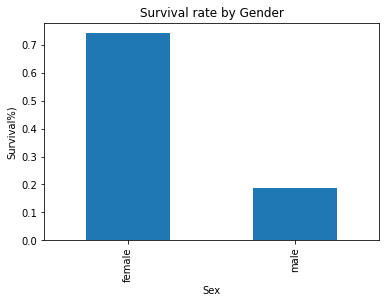

In [155]:
#survival rate by gender (survived)
(train.groupby("Sex").Survived.mean()
 .plot(kind="bar",title="Survival rate by Gender").set_ylabel("Survival%)"))

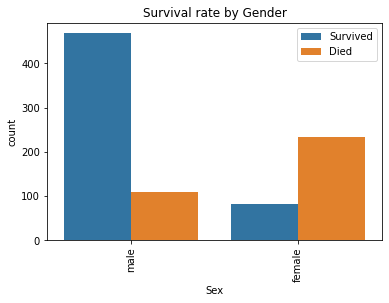

In [156]:
#survival rate by gender for all
(train[["Sex","Survived"]].groupby(["Sex"]).mean().plot.bar(title="Survival rate by Gender")
.set_ylabel("Survival(%)"))
seaborn.countplot("Sex",hue="Survived",data=train,)
plt.legend(labels=["_","Survived","Died"])
plt.savefig("./output/survival_gender.png")
clear_output()

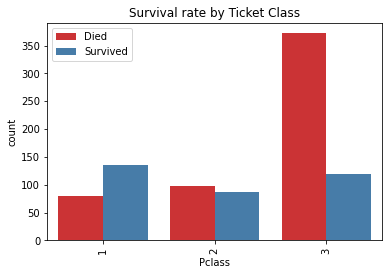

In [157]:
#survival rate by Ticket class
(train[["Pclass","Survived"]].groupby(["Pclass"]).mean()
 .plot.bar(title="Survival rate by Ticket Class").set_ylabel("Survival(%)"))
seaborn.countplot("Pclass",hue="Survived",data=train,palette="Set1")
plt.legend(labels=["_","Died","Survived"])
plt.savefig("./output/survival_class.png")
clear_output()

**Remark:** It seems most deaths came from third class.

Text(0, 0.5, 'Survival(%)')

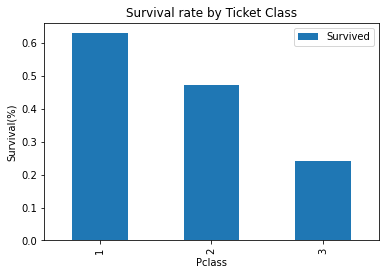

In [158]:
(train[["Pclass","Survived"]].groupby(["Pclass"]).mean()
 .plot.bar(title="Survival rate by Ticket Class").set_ylabel("Survival(%)"))

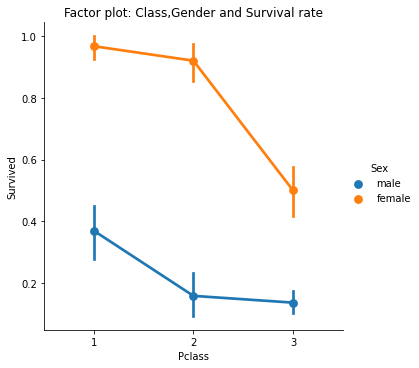

In [159]:
#survival rate by Ticket class

seaborn.factorplot("Pclass","Survived",hue="Sex",data=train)

plt.title("Factor plot: Class,Gender and Survival rate")
plt.savefig("./output/survival_class_factorplot.png")
clear_output()